In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("C:/Users/kacik/Documents/sleep_merged.tsv", sep="\t")

In [3]:
df=df.dropna(how='all')
df.reset_index(drop=True,inplace=True)
df.head(5)



,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0


In [4]:
df.shape

(87, 16)

In [5]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [6]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [7]:
df.Genus.value_counts()

Genus
Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: count, Length: 80, dtype: int64

In [8]:
df.Order.value_counts()

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [9]:
df.Vore.value_counts()

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [10]:
df.Genus.value_counts()

Genus
Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: count, Length: 80, dtype: int64

In [11]:
df1=df.drop(["Species", "Genus","Order", "Conservation", "Dreaming", "NonDreaming","Awake",'BrainWt','LifeSpan'], axis=1)
df2=df.drop(["Species", "Genus","Order", "Conservation","Vore"], axis=1)

In [12]:
df2.corr()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.000000,0.925683,-0.310147,0.310119,-0.390767,-0.166742,0.302382,0.696004,0.070922,0.370613,0.150341
BrainWt,0.925683,1.000000,-0.319661,0.319476,-0.376848,-0.093491,0.506326,0.776817,0.027343,0.383869,0.143061
TotalSleep,-0.310147,-0.319661,1.000000,-0.999999,0.915648,0.749131,-0.417433,-0.660791,-0.408713,-0.677876,-0.587729
Awake,0.310119,0.319476,-0.999999,1.000000,-0.915648,-0.749136,0.417433,0.660791,0.408713,0.677876,0.587729
NonDreaming,-0.390767,-0.376848,0.915648,-0.915648,1.000000,0.517966,-0.400311,-0.588502,-0.332149,-0.550287,-0.495562
Dreaming,-0.166742,-0.093491,0.749131,-0.749136,0.517966,1.000000,-0.292212,-0.500477,-0.500967,-0.571760,-0.628060
LifeSpan,0.302382,0.506326,-0.417433,0.417433,-0.400311,-0.292212,1.000000,0.643651,-0.116818,0.372426,0.049262
Gestation,0.696004,0.776817,-0.660791,0.660791,-0.588502,-0.500477,0.643651,1.000000,0.169895,0.659636,0.356378
Predation,0.070922,0.027343,-0.408713,0.408713,-0.332149,-0.500967,-0.116818,0.169895,1.000000,0.619839,0.930782
Exposure,0.370613,0.383869,-0.677876,0.677876,-0.550287,-0.571760,0.372426,0.659636,0.619839,1.000000,0.770361


In [13]:
index_with_nan = df1.index[df1.isnull().any(axis=1)]
index_with_nan

Index([ 2,  8, 10, 11, 14, 15, 17, 18, 19, 20, 23, 27, 28, 34, 37, 45, 50, 51,
       55, 56, 61, 62, 63, 69, 73, 74, 76, 77, 78, 79, 83, 84, 86],
      dtype='int64')

In [14]:
df1.drop(index_with_nan, inplace=True)
df1.reset_index(drop=True,inplace=True)
df1




,Vore,BodyWt,TotalSleep,Gestation,Predation,Exposure,Danger
0,herbi,6654.000,3.3,645.0,3.0,5.0,3.0
1,omni,1.000,8.3,42.0,3.0,1.0,3.0
2,carni,3.380,12.5,60.0,1.0,1.0,1.0
3,herbi,0.920,16.6,25.0,5.0,2.0,3.0
4,herbi,2547.000,3.9,624.0,3.0,5.0,4.0
5,omni,25.235,9.4,180.0,4.0,4.0,4.0
6,insecti,0.023,19.7,35.0,1.0,1.0,1.0
7,herbi,207.501,4.4,392.0,4.0,5.0,4.0
8,omni,52.200,9.7,230.0,1.0,1.0,1.0
9,herbi,0.420,12.5,112.0,5.0,4.0,4.0


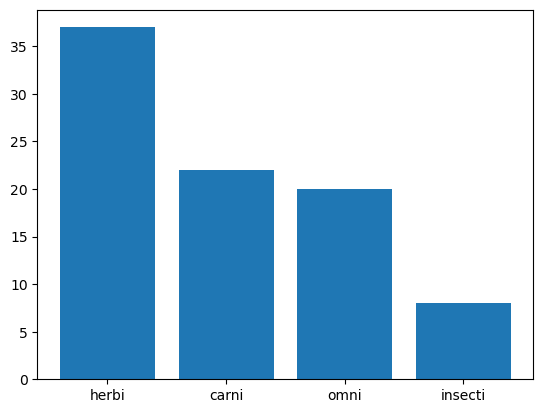

In [15]:
plt.bar(x=df.Vore.value_counts().index,height=df.Vore.value_counts())
plt.show()


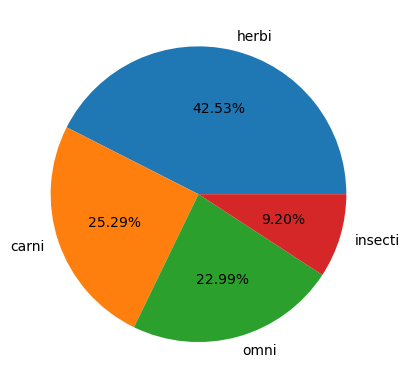

In [16]:
plt.pie(df.Vore.value_counts(),labels=df.Vore.value_counts().index,autopct='%1.2f%%')
plt.show()

Text(0, 0.5, 'TotalSleep')

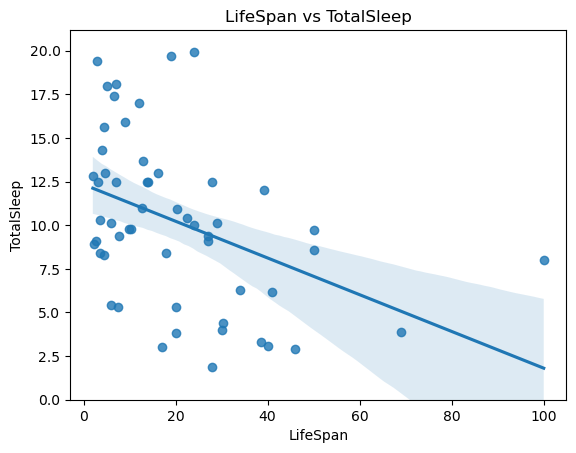

In [17]:
sns.regplot(x=df["LifeSpan"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("LifeSpan vs TotalSleep")
plt.xlabel("LifeSpan")
plt.ylabel("TotalSleep")

Text(0, 0.5, 'TotalSleep')

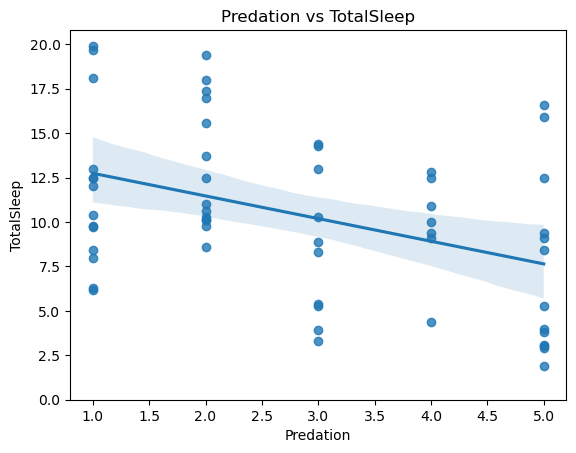

In [18]:
sns.regplot(x=df["Predation"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("Predation vs TotalSleep")
plt.xlabel("Predation")
plt.ylabel("TotalSleep")

Text(0, 0.5, 'TotalSleep')

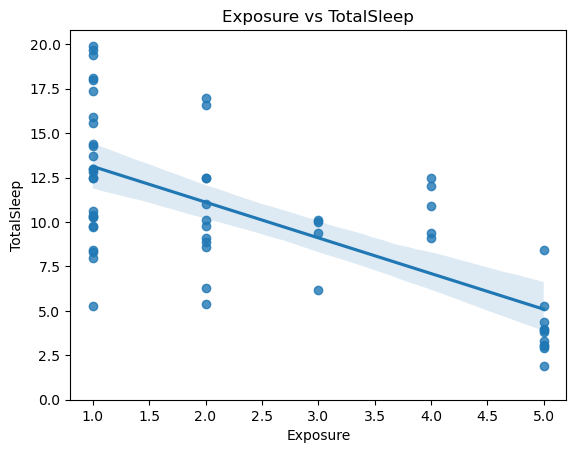

In [19]:
sns.regplot(x=df["Exposure"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("Exposure vs TotalSleep")
plt.xlabel("Exposure")
plt.ylabel("TotalSleep")

Text(0, 0.5, 'TotalSleep')

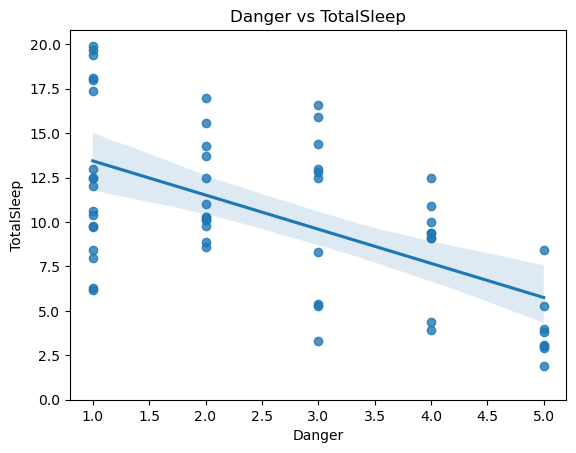

In [20]:
sns.regplot(x=df["Danger"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("Danger vs TotalSleep")
plt.xlabel("Danger")
plt.ylabel("TotalSleep")

Text(0, 0.5, 'TotalSleep')

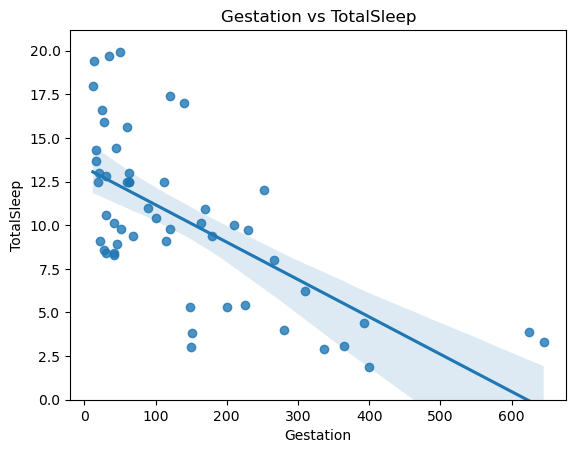

In [21]:
sns.regplot(x=df["Gestation"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("Gestation vs TotalSleep")
plt.xlabel("Gestation")
plt.ylabel("TotalSleep")

Text(0, 0.5, 'TotalSleep')

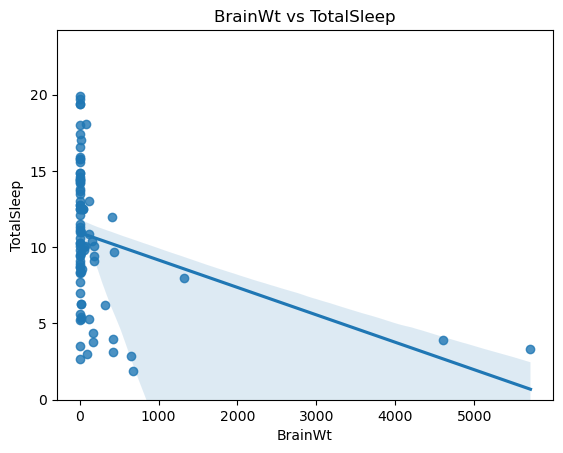

In [22]:
sns.regplot(x=df["BrainWt"], y=df["TotalSleep"], data=df1)
plt.ylim(0,)
plt.title("BrainWt vs TotalSleep")
plt.xlabel("BrainWt")
plt.ylabel("TotalSleep")

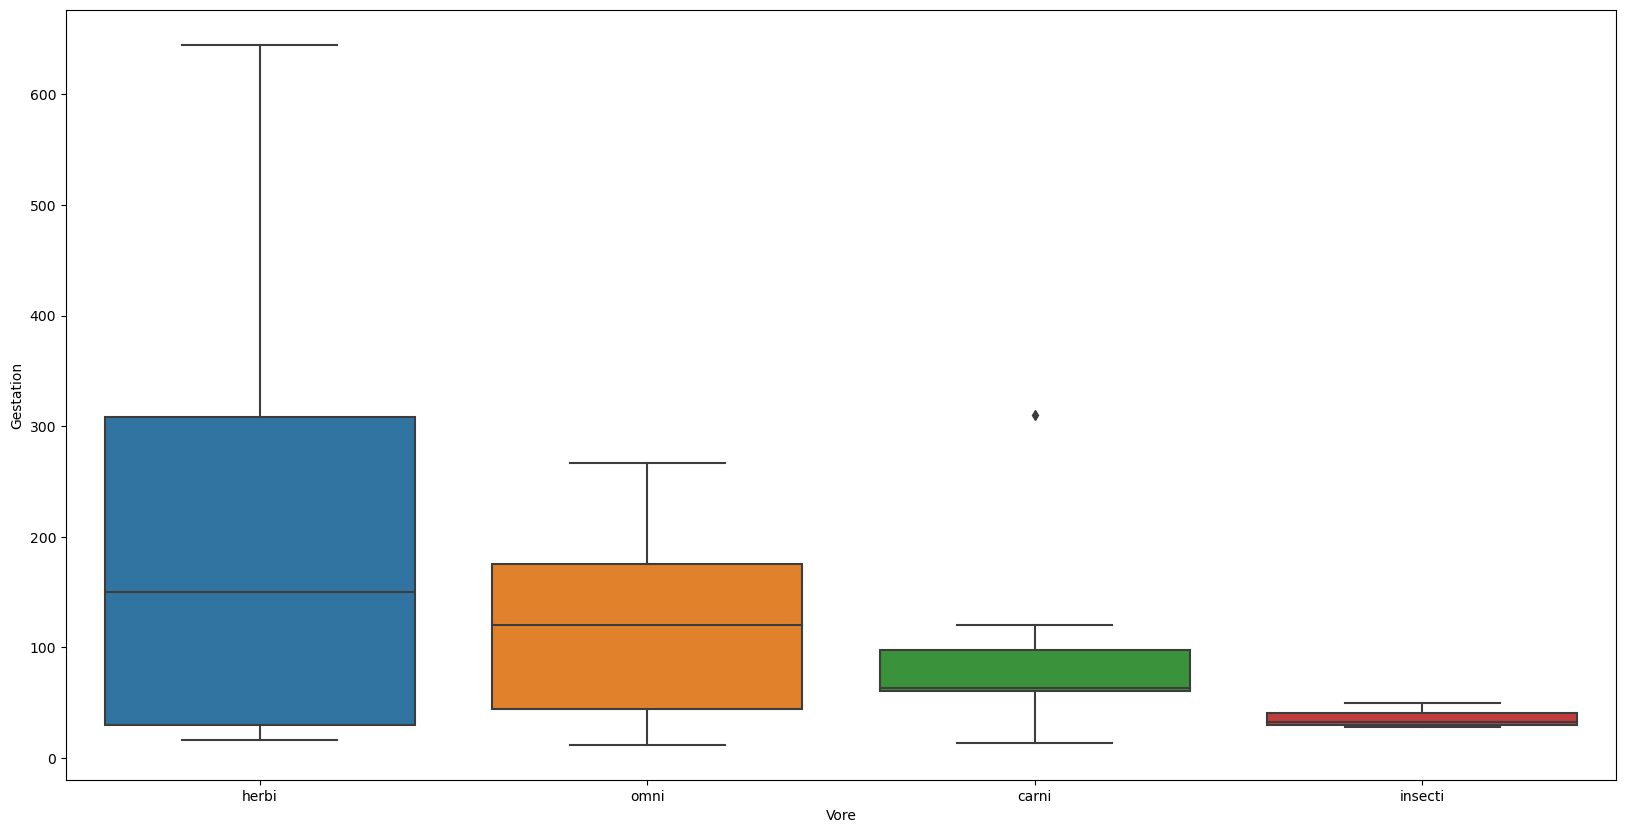

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Vore,y=df.Gestation)
plt.show()

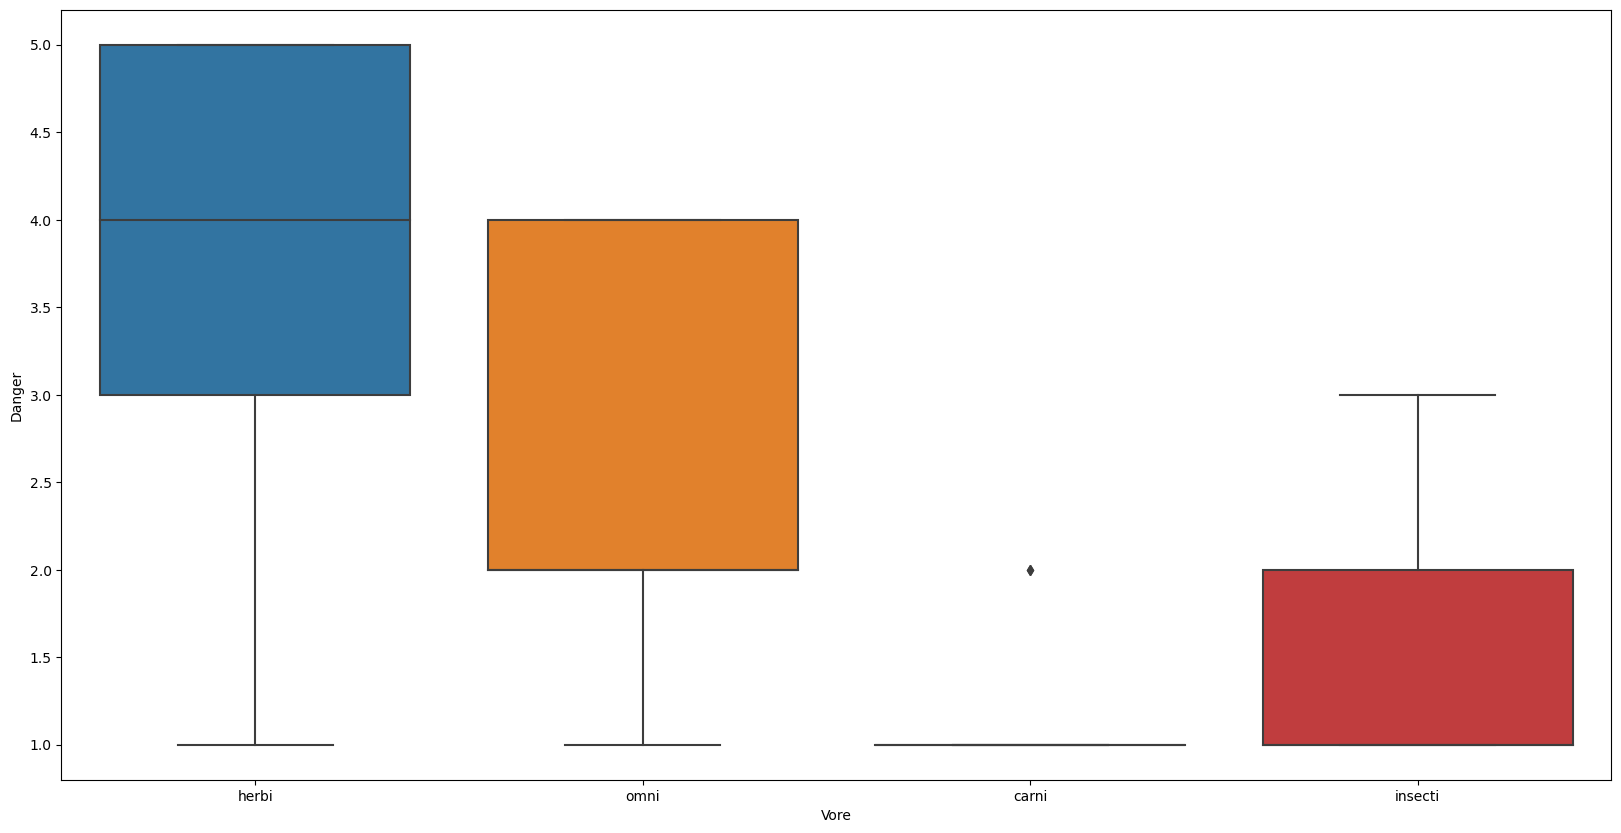

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Vore,y=df.Danger)
plt.show()

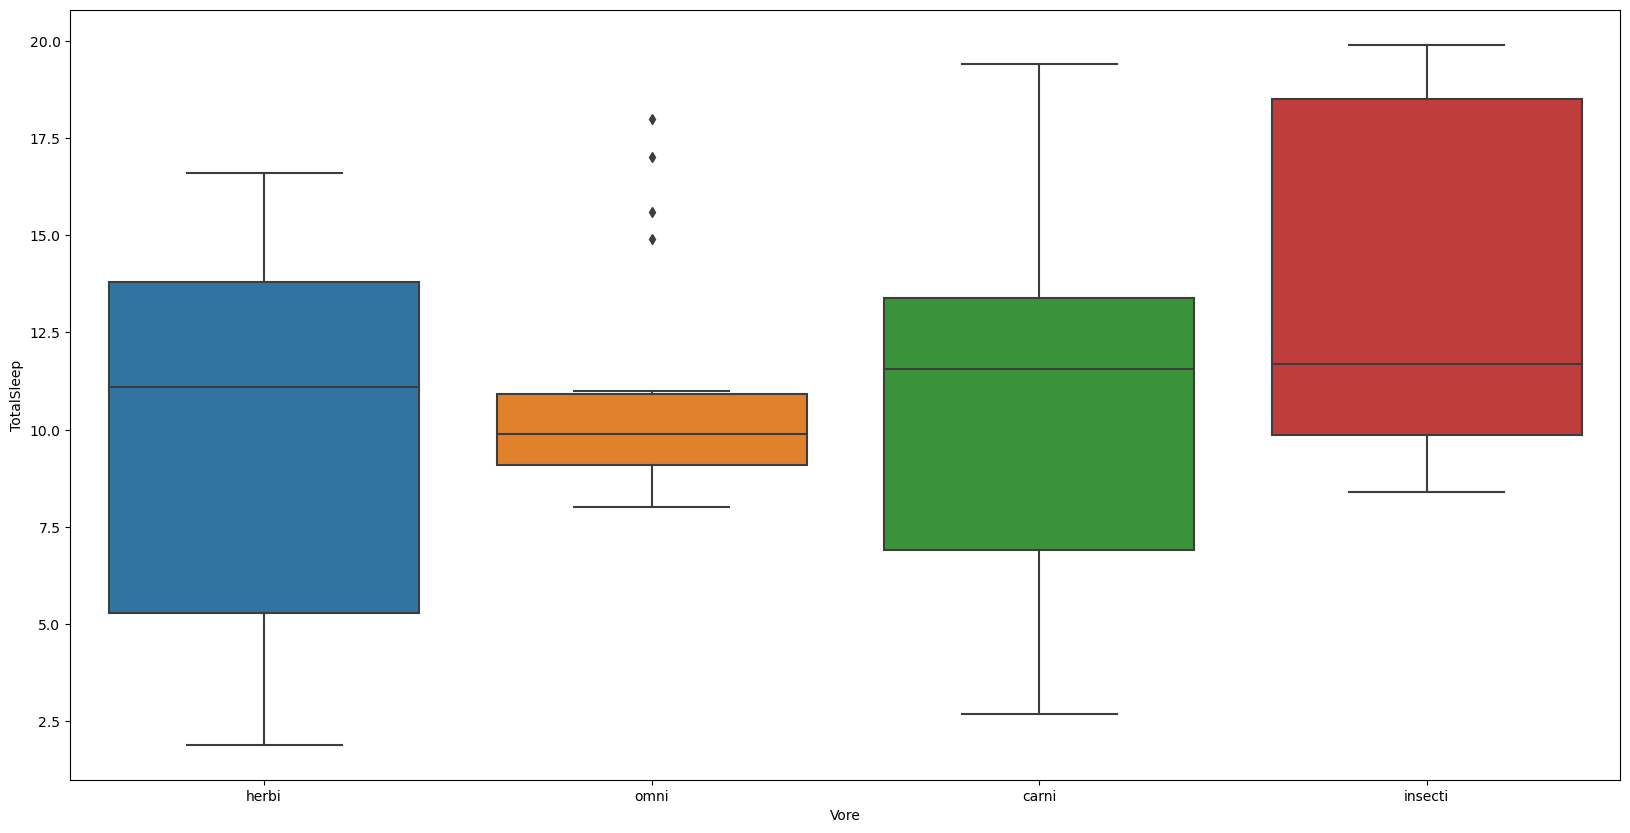

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Vore,y=df.TotalSleep)
plt.show()

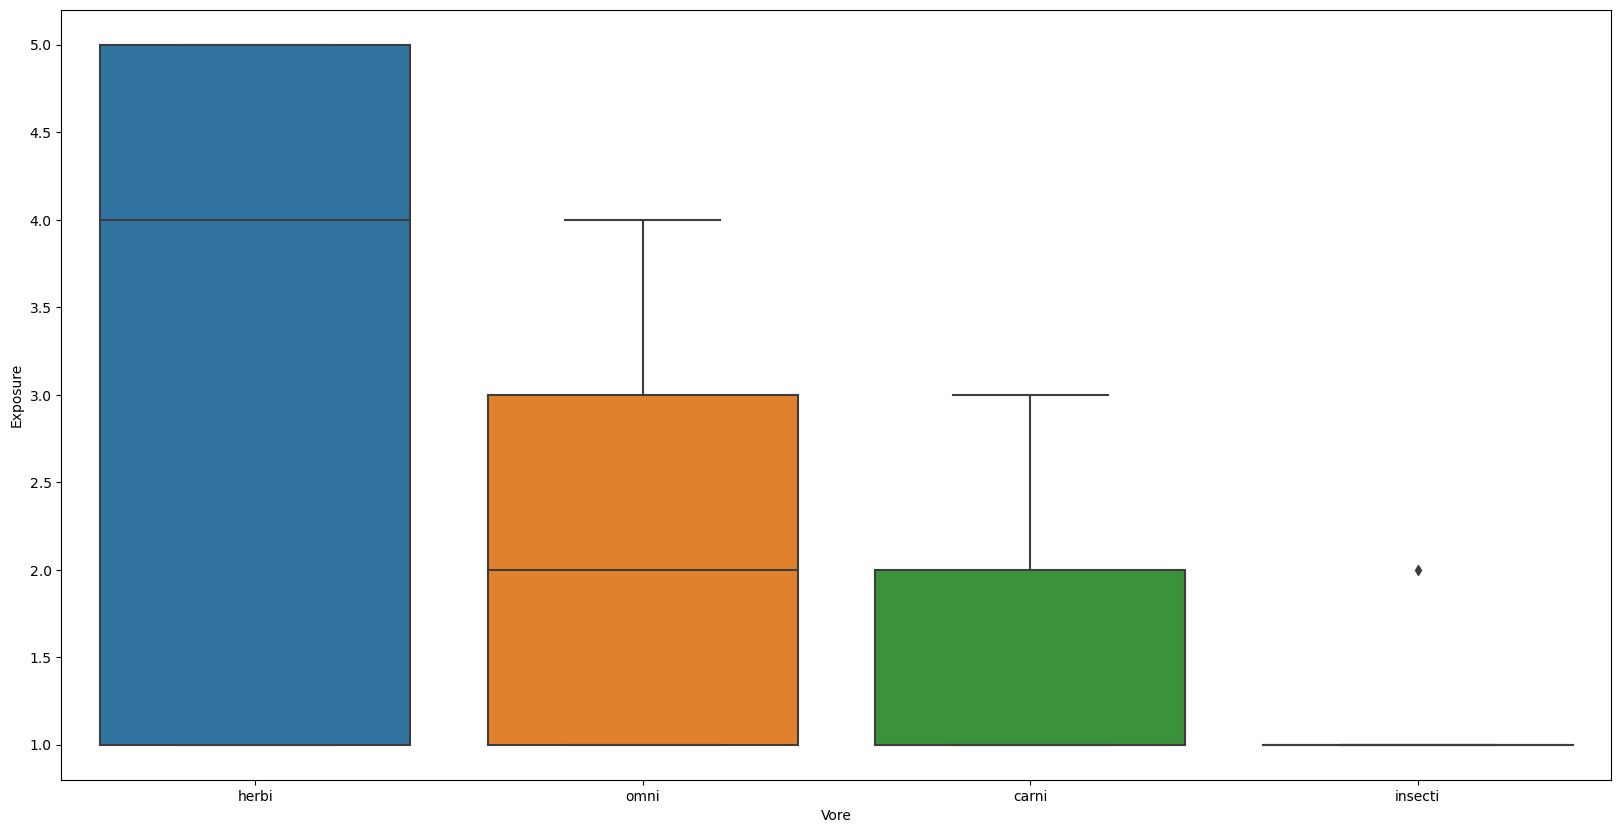

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Vore,y=df.Exposure)
plt.show()

In [27]:
df_processed=df.drop(["Species", "Genus","Order", "Conservation", "Dreaming", "NonDreaming","Awake","BrainWt"], axis=1)

df_processed

,Vore,BodyWt,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,herbi,6654.000,3.3,38.6,645.0,3.0,5.0,3.0
1,omni,1.000,8.3,4.5,42.0,3.0,1.0,3.0
2,omni,0.044,8.7,NaN,NaN,NaN,NaN,NaN
3,carni,3.380,12.5,14.0,60.0,1.0,1.0,1.0
4,herbi,0.920,16.6,NaN,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...
82,omni,4.750,10.0,24.0,210.0,4.0,3.0,4.0
83,herbi,0.045,7.0,NaN,NaN,NaN,NaN,NaN
84,herbi,0.035,12.8,NaN,NaN,NaN,NaN,NaN
85,carni,3.500,19.4,3.0,14.0,2.0,1.0,1.0


In [28]:
index_with_nan3 = df_processed.index[df_processed.isnull().any(axis=1)]
index_with_nan3

Index([ 2,  4,  8, 10, 11, 14, 15, 17, 18, 19, 20, 23, 27, 28, 34, 37, 45, 49,
       50, 51, 52, 55, 56, 61, 62, 63, 69, 73, 74, 76, 77, 78, 79, 83, 84, 86],
      dtype='int64')

In [29]:
df_processed.drop(index_with_nan3, inplace=True)
df_processed.reset_index(drop=True,inplace=True)
df_processed

,Vore,BodyWt,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,herbi,6654.000,3.3,38.6,645.0,3.0,5.0,3.0
1,omni,1.000,8.3,4.5,42.0,3.0,1.0,3.0
2,carni,3.380,12.5,14.0,60.0,1.0,1.0,1.0
3,herbi,2547.000,3.9,69.0,624.0,3.0,5.0,4.0
4,omni,25.235,9.4,27.0,180.0,4.0,4.0,4.0
5,insecti,0.023,19.7,19.0,35.0,1.0,1.0,1.0
6,herbi,207.501,4.4,30.4,392.0,4.0,5.0,4.0
7,omni,52.200,9.7,50.0,230.0,1.0,1.0,1.0
8,herbi,0.420,12.5,7.0,112.0,5.0,4.0,4.0
9,herbi,600.000,4.0,30.0,281.0,5.0,5.0,5.0


In [30]:
df_processed= pd.concat([df_processed,pd.get_dummies(df_processed.Vore, dtype=int)],axis=1).drop(columns="Vore")

In [31]:
df_processed

,BodyWt,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,carni,herbi,insecti,omni
0,6654.000,3.3,38.6,645.0,3.0,5.0,3.0,0,1,0,0
1,1.000,8.3,4.5,42.0,3.0,1.0,3.0,0,0,0,1
2,3.380,12.5,14.0,60.0,1.0,1.0,1.0,1,0,0,0
3,2547.000,3.9,69.0,624.0,3.0,5.0,4.0,0,1,0,0
4,25.235,9.4,27.0,180.0,4.0,4.0,4.0,0,0,0,1
5,0.023,19.7,19.0,35.0,1.0,1.0,1.0,0,0,1,0
6,207.501,4.4,30.4,392.0,4.0,5.0,4.0,0,1,0,0
7,52.200,9.7,50.0,230.0,1.0,1.0,1.0,0,0,0,1
8,0.420,12.5,7.0,112.0,5.0,4.0,4.0,0,1,0,0
9,600.000,4.0,30.0,281.0,5.0,5.0,5.0,0,1,0,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_test = train_test_split(df_processed,test_size = 0.40, random_state=163)


In [34]:
X_train = df_train.loc[:,['Danger','Predation','Gestation', 'Exposure',"BodyWt",'omni','herbi','carni','insecti',"LifeSpan"]].values
y_train = df_train.TotalSleep.values


In [35]:
X_test = df_test.loc[:,['Danger','Predation','Gestation', 'Exposure','BodyWt','omni','herbi','carni','insecti','LifeSpan']].values
y_test = df_test.TotalSleep.values

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_test_predicted =  reg.predict(X_test)


In [40]:

from sklearn.metrics import mean_squared_error, r2_score

In [41]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 12.99
Coefficient of determination: 0.61


In [42]:
reg.coef_

array([-1.00994678e+00, -2.83262733e-01, -1.94241600e-02,  1.36370840e-01,
        6.82679529e-04,  6.09873440e-01,  3.44487587e-01, -7.27509064e-01,
       -2.26851963e-01, -5.69314272e-03])

In [43]:
'Danger','Predation','Gestation', 'Exposure',"BodyWt",'omni','herbi','carni','insecti',"LifeSpan"

('Danger',
 'Predation',
 'Gestation',
 'Exposure',
 'BodyWt',
 'omni',
 'herbi',
 'carni',
 'insecti',
 'LifeSpan')

In [44]:
df1= pd.concat([df1,pd.get_dummies(df1.Vore, dtype=int)],axis=1).drop(columns="Vore")


In [45]:
df1

,BodyWt,TotalSleep,Gestation,Predation,Exposure,Danger,carni,herbi,insecti,omni
0,6654.000,3.3,645.0,3.0,5.0,3.0,0,1,0,0
1,1.000,8.3,42.0,3.0,1.0,3.0,0,0,0,1
2,3.380,12.5,60.0,1.0,1.0,1.0,1,0,0,0
3,0.920,16.6,25.0,5.0,2.0,3.0,0,1,0,0
4,2547.000,3.9,624.0,3.0,5.0,4.0,0,1,0,0
5,25.235,9.4,180.0,4.0,4.0,4.0,0,0,0,1
6,0.023,19.7,35.0,1.0,1.0,1.0,0,0,1,0
7,207.501,4.4,392.0,4.0,5.0,4.0,0,1,0,0
8,52.200,9.7,230.0,1.0,1.0,1.0,0,0,0,1
9,0.420,12.5,112.0,5.0,4.0,4.0,0,1,0,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_train, df_test = train_test_split(df1,test_size = 0.40, random_state=503)


In [48]:
X_train = df_train.loc[:,['Danger','Predation','Gestation', 'Exposure','omni','herbi','carni','insecti']].values
y_train = df_train.TotalSleep.values
X_test = df_test.loc[:,['Danger','Predation','Gestation', 'Exposure','omni','herbi','carni','insecti']].values
y_test = df_test.TotalSleep.values

In [49]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [50]:
y_test_predicted1 =  reg1.predict(X_test)
y_test_predicted1

array([10.971411  ,  2.02785566,  8.81759304, 13.20845529, -0.75605102,
        6.30336096,  6.25830735, 12.65279402, 11.88499957,  8.06045201,
       10.87067112, 13.16005225,  3.04448269, 13.37365188, 16.30606181,
        3.48000099, 14.68016352,  4.30598396, 13.85752997, 12.48592195,
       11.52707227, 11.14536324])

In [51]:

from sklearn.metrics import mean_squared_error, r2_score

In [52]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted1))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_predicted1))

Mean squared error: 5.04
Coefficient of determination: 0.79


In [53]:
reg1.intercept_

16.161916729384693

In [54]:
reg1.coef_

array([-3.09928199,  1.5050934 , -0.01501787, -0.02669606,  0.4401508 ,
        0.46851259, -0.38645084, -0.52221255])

In [55]:
'Danger','Predation','Gestation', 'Exposure','omni','herbi','carni','insecti'

('Danger',
 'Predation',
 'Gestation',
 'Exposure',
 'omni',
 'herbi',
 'carni',
 'insecti')

C:\Users\kacik\AppData\Local\Temp\ipykernel_11564\2863903275.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\kacik\AppData\Local\Temp\ipykernel_11564\2863903275.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

<Axes: ylabel='Density'>

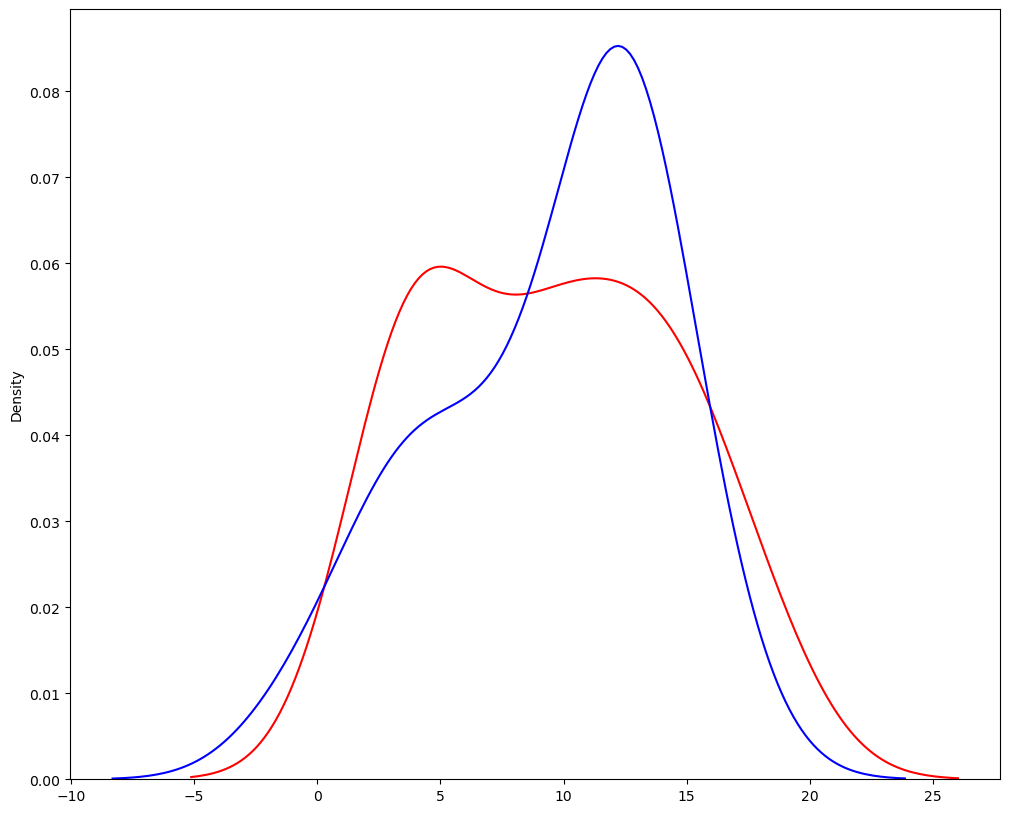

In [56]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predicted1, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [57]:
filename = 'bestmodel.sav'
joblib.dump(reg1, filename)

['bestmodel.sav']

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
regr = RandomForestRegressor()

In [60]:
regr.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [61]:
y_test_predicted_rf= regr.predict(X_test)

In [62]:

from sklearn.metrics import mean_squared_error, r2_score

In [63]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted_rf))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_predicted_rf))

Mean squared error: 7.72
Coefficient of determination: 0.67


In [64]:
from sklearn.model_selection import cross_val_score